In [1]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from helpers import upsample_train, plot_roc_curve, preprocess_tabnet_data

In [2]:
raw_data = pd.read_excel('data/existing-customers.xlsx')

/Users/jniedziela/.pyenv/versions/3.10.0/envs/DM/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [145]:
X_train, y_train, X_test, y_test, cat_idxs, cat_dims, enc, t = preprocess_tabnet_data(raw_data)

/var/folders/0z/9gp9vcnj7tb2g040j_v9z31r0000gn/T/ipykernel_8917/4118205295.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col].iloc[i] = rep_value
/var/folders/0z/9gp9vcnj7tb2g040j_v9z31r0000gn/T/ipykernel_8917/4118205295.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col].iloc[i] = rep_value
/var/folders/0z/9gp9vcnj7tb2g040j_v9z31r0000gn/T/ipykernel_8917/4118205295.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [147]:
max_epochs = 200

In [148]:
tabnet_params = {"cat_idxs":cat_idxs,
                 "cat_dims":cat_dims,
                 "cat_emb_dim":2,
                 "optimizer_fn":torch.optim.Adam,
                 "optimizer_params":dict(lr=2e-2),
                 "scheduler_params":{"step_size":50,
                                 "gamma":0.9},
                 "scheduler_fn":torch.optim.lr_scheduler.StepLR,
                 "mask_type":'entmax'
                }

model = TabNetClassifier(
    **tabnet_params
    )

save_history = []

model.fit(
    X_train=X_train, 
    y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'test'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=max_epochs,
    patience=50,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
)
save_history.append(model.history["test_auc"])



/Users/jniedziela/.pyenv/versions/3.10.0/envs/DM/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.54653 | train_auc: 0.71586 | train_accuracy: 0.61175 | test_auc: 0.7085  | test_accuracy: 0.46881 |  0:00:04s
epoch 1  | loss: 0.44157 | train_auc: 0.80509 | train_accuracy: 0.59055 | test_auc: 0.81039 | test_accuracy: 0.38722 |  0:00:08s
epoch 2  | loss: 0.4134  | train_auc: 0.87903 | train_accuracy: 0.67662 | test_auc: 0.87485 | test_accuracy: 0.51168 |  0:00:13s
epoch 3  | loss: 0.39444 | train_auc: 0.88958 | train_accuracy: 0.76472 | test_auc: 0.88586 | test_accuracy: 0.67671 |  0:00:17s
epoch 4  | loss: 0.38599 | train_auc: 0.90094 | train_accuracy: 0.77466 | test_auc: 0.89672 | test_accuracy: 0.6787  |  0:00:22s
epoch 5  | loss: 0.37669 | train_auc: 0.90559 | train_accuracy: 0.80047 | test_auc: 0.89869 | test_accuracy: 0.72357 |  0:00:26s
epoch 6  | loss: 0.37092 | train_auc: 0.91141 | train_accuracy: 0.81513 | test_auc: 0.90493 | test_accuracy: 0.75522 |  0:00:31s
epoch 7  | loss: 0.36947 | train_auc: 0.91362 | train_accuracy: 0.82401 | test_auc: 0.90402 | tes

/Users/jniedziela/.pyenv/versions/3.10.0/envs/DM/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


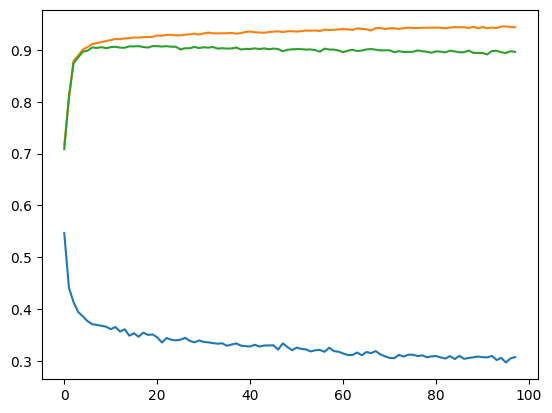

In [149]:
plt.plot(model.history['loss'])

plt.plot(model.history['train_auc'])
plt.plot(model.history['test_auc'])

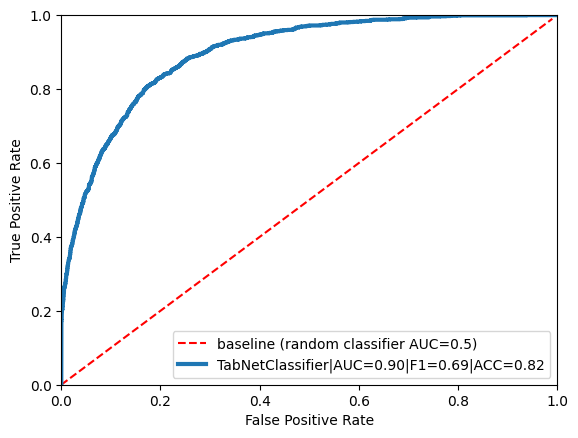

In [150]:
plot_roc_curve(model, X_test, y_test, 1)

In [155]:
model.save_model('tabnet/tabnet_model_final.pt')

Successfully saved model at tabnet/tabnet_model_final.pt.zip


'tabnet/tabnet_model_final.pt.zip'